### Importing the modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Load the data

In [2]:
df = pd.read_csv("/content/Social_Network_Ads.csv")

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df = df.iloc[:,2:]

In [5]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


### Split the data to dependent and independent features

In [6]:
X = df.drop("Purchased",axis=1)
y = df["Purchased"]

### Train Test Split

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [8]:
X_train.shape,X_test.shape

((320, 2), (80, 2))

#### Feature Scaling

In [9]:
sc = StandardScaler()

In [10]:
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [11]:
sc.mean_

array([3.7787500e+01, 6.9359375e+04])

In [12]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [13]:
X_train_scaled

,Age,EstimatedSalary
0,0.889288,-0.659246
1,-0.172548,0.873927
2,-1.041324,-0.364405
3,0.985819,0.608570
4,-0.944793,0.579086
...,...,...
315,0.792758,1.404640
316,0.985819,-0.836150
317,-1.717038,-1.366863
318,-0.848263,0.313729


In [14]:
X_test_scaled

,Age,EstimatedSalary
0,-0.848263,0.402181
1,-1.620508,-1.573252
2,-0.076018,-0.482341
3,-0.848263,0.166309
4,1.565002,0.018888
...,...,...
75,-0.269079,0.077856
76,2.144186,0.962379
77,-1.330916,-0.334921
78,1.661533,1.640513


In [15]:
np.round(X_train.describe(),1)

,Age,EstimatedSalary
count,320.0,320.0
mean,37.8,69359.4
std,10.4,33969.7
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,69500.0
75%,46.0,87000.0
max,60.0,150000.0


In [16]:
np.round(X_train_scaled.describe(),1)

,Age,EstimatedSalary
count,320.0,320.0
mean,-0.0,-0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.1,2.4


### Scatterplot Before Scaling vs After Scaling

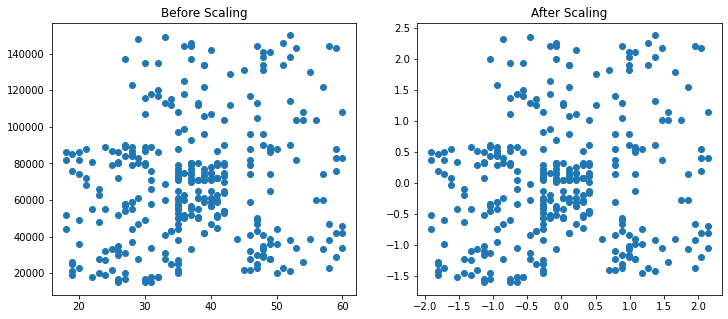

In [17]:
fig , ax = plt.subplots(1,2,figsize=(12,5))
ax[0].set_title("Before Scaling")
ax[0].scatter(X_train["Age"],X_train["EstimatedSalary"])
ax[1].set_title("After Scaling")
ax[1].scatter(X_train_scaled["Age"],X_train_scaled["EstimatedSalary"])

### Kdeplot Before Scaling vs After Scaling

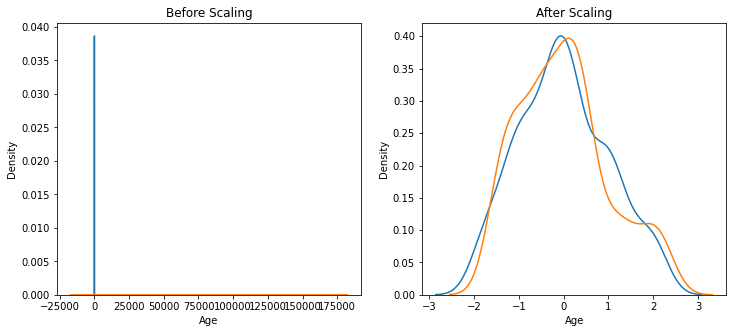

In [18]:
fig , ax = plt.subplots(1,2,figsize=(12,5))
ax[0].set_title("Before Scaling")
sns.kdeplot(X_train["Age"],ax=ax[0])
sns.kdeplot(X_train["EstimatedSalary"],ax=ax[0])
ax[1].set_title("After Scaling")
sns.kdeplot(X_train_scaled["Age"],ax=ax[1])
sns.kdeplot(X_train_scaled["EstimatedSalary"],ax=ax[1])

#### Age Distribution Before Scaling vs After Scaling

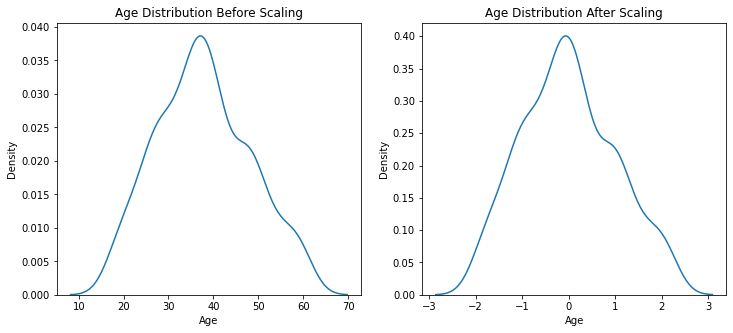

In [19]:
fig , ax = plt.subplots(1,2,figsize=(12,5))
ax[0].set_title("Age Distribution Before Scaling")
sns.kdeplot(X_train["Age"],ax=ax[0])
ax[1].set_title("Age Distribution After Scaling")
sns.kdeplot(X_train_scaled["Age"],ax=ax[1])

#### Salary Distribution Before Scaling vs After Scaling

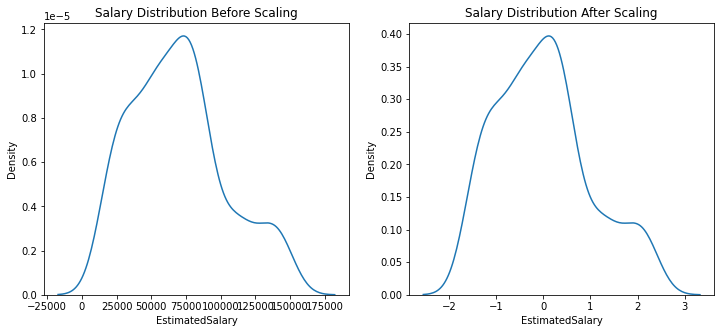

In [20]:
fig , ax = plt.subplots(1,2,figsize=(12,5))
ax[0].set_title("Salary Distribution Before Scaling")
sns.kdeplot(X_train["EstimatedSalary"],ax=ax[0])
ax[1].set_title("Salary Distribution After Scaling")
sns.kdeplot(X_train_scaled["EstimatedSalary"],ax=ax[1])

### Why scaling is important?

##### 1. Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [22]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [23]:
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

LogisticRegression()

In [24]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [25]:
print("Score Before Scaling",accuracy_score(y_test,y_pred))
print("Score After Scaling",accuracy_score(y_test,y_pred_scaled))

Score Before Scaling 0.6
Score After Scaling 0.8125


##### 2. Decison Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
dc = DecisionTreeClassifier()
dc_scaled = DecisionTreeClassifier()

In [28]:
dc.fit(X_train,y_train)
dc_scaled.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [29]:
y_pred = dc.predict(X_test)
y_pred_scaled = dc_scaled.predict(X_test_scaled)

In [30]:
print("Score Before Scaling",accuracy_score(y_test,y_pred))
print("Score After Scaling",accuracy_score(y_test,y_pred_scaled))

Score Before Scaling 0.8625
Score After Scaling 0.85


### Effects of Outliers

In [31]:
df = df.append(pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]}),ignore_index=True)

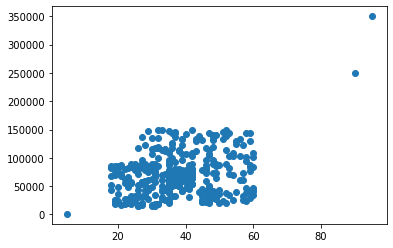

In [32]:
plt.scatter(df["Age"],df["EstimatedSalary"])

In [33]:
X = df.drop("Purchased",axis=1)
y = df["Purchased"]

In [34]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [35]:
sc = StandardScaler()

In [36]:
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [37]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_test.columns)

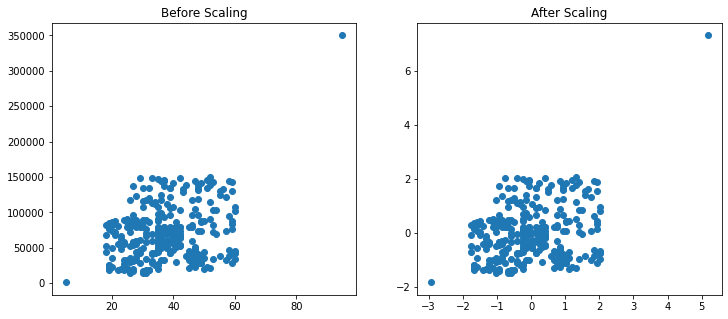

In [38]:
fig , ax = plt.subplots(1,2,figsize=(12,5))
ax[0].set_title("Before Scaling")
ax[0].scatter(X_train["Age"],X_train["EstimatedSalary"])
ax[1].set_title("After Scaling")
ax[1].scatter(X_train_scaled["Age"],X_train_scaled["EstimatedSalary"])